# 5. Live coding

This notebook will show you how we analyse a text in real life. To do so, we will examine two judge responses to asylum's claims in the UK.







Legend of symbols:

- 🤓: Tips

- 🤖📝: Your turn

- ❓: Question

- 💫: Extra exercise 

## 5.1. Read text

As we have learned in this course, the first step is to import the text into this notebook.

Two approaches:

- 1) Copy and paste content in a **<tt>.txt<tt>** file.
- 2) Install **<tt>pdftotext<tt>**: https://github.com/jalan/pdftotext.

In [47]:
# 1)
# Read the raw file from txt
f = open('../data/asylum_claims.txt','r')
text = f.read()
f.close()

In [48]:
text

'Upper Tribunal\n(Immigration and Asylum Chamber)\nAppeal Number: PA/00240/2019\nTHE IMMIGRATION ACTS\nHeard at Birmingham CJC\nDecision\n&\nReasons\nPromulgated\nOn 21 November 2019\nOn 8 November 2019\nBefore\nDEPUTY UPPER TRIBUNAL JUDGE O’RYAN\nBetween\nMR D A\n(ANONYMITY DIRECTION MADE)\nAppellant\nand\nTHE SECRETARY OF STATE FOR THE HOME DEPARTMENT\nRespondent\nRepresentation:\nFor the Appellant:\nMr Sharif, Fountain Solicitors\nFor the Respondent: Mr Mills, Senior Home Office Presenting Officer\nDECISION AND REASONS\n1.\nThis is the Appellant’s appeal against the decision of Judge of the First-tier\nTribunal Boylan-Kemp MBE dated 2 May 2019 dismissing the Appellant’s\nappeal against the Respondent’s decision of 23 November 2018 refusing\nhis human rights and protection claim.\n© CROWN COPYRIGHT 2019Appeal Number: PA/00240/2019\n2. The Appellant is a national of Iraq of Kurdish origin and from Sulamaniyah\nin the IKR. He gave an account that he was at risk of serious harm in the\n

In [49]:
# Let's substitute \n by spaces
import re
text = re.sub('\n', ' ', text)

In [57]:
print(text)

Upper Tribunal (Immigration and Asylum Chamber) Appeal Number: PA/00240/2019 THE IMMIGRATION ACTS Heard at Birmingham CJC Decision & Reasons Promulgated On 21 November 2019 On 8 November 2019 Before DEPUTY UPPER TRIBUNAL JUDGE O’RYAN Between MR D A (ANONYMITY DIRECTION MADE) Appellant and THE SECRETARY OF STATE FOR THE HOME DEPARTMENT Respondent Representation: For the Appellant: Mr Sharif, Fountain Solicitors For the Respondent: Mr Mills, Senior Home Office Presenting Officer DECISION AND REASONS 1. This is the Appellant’s appeal against the decision of Judge of the First-tier Tribunal Boylan-Kemp MBE dated 2 May 2019 dismissing the Appellant’s appeal against the Respondent’s decision of 23 November 2018 refusing his human rights and protection claim. © CROWN COPYRIGHT 2019Appeal Number: PA/00240/2019 2. The Appellant is a national of Iraq of Kurdish origin and from Sulamaniyah in the IKR. He gave an account that he was at risk of serious harm in the IKR by reason of his family and ex

In [58]:
import pdftotext

# Load your PDF
with open("../data/PA059452018.pdf", "rb") as f:
    pdf = pdftotext.PDF(f)

# If it's password-protected
with open("../data/PA002402019.pdf", "rb") as f:
    pdf = pdftotext.PDF(f, "secret")

# How many pages?
print(len(pdf))

# Iterate over all the pages
for page in pdf:
    print(page)

# Read some individual pages
print(pdf[0])
print(pdf[1])

# Read all the text into one string
pdf = "\n\n".join(pdf)
print(pdf)

6
Upper Tribunal
(Immigration and Asylum Chamber)                  Appeal Number: PA/00240/2019
                            THE IMMIGRATION ACTS
Heard at Birmingham CJC                           Decision      &       Reasons
                                                  Promulgated
On 8 November 2019                                On 21 November 2019
                                     Before
                  DEPUTY UPPER TRIBUNAL JUDGE O’RYAN
                                    Between
                                     MR D A
                       (ANONYMITY DIRECTION MADE)
                                                                        Appellant
                                      and
         THE SECRETARY OF STATE FOR THE HOME DEPARTMENT
                                                                      Respondent
Representation:
For the Appellant:   Mr Sharif, Fountain Solicitors
For the Respondent: Mr Mills, Senior Home Office Presenting Officer
           

## 5.2. Basic statistics

🤓 It is important when analysing text to know the basic figures: 
- How many words do we have? 
- How many sentences? 
- What are the most common words? 


❓ More questions?

### 5.2.1. How many words do we have? 

In [59]:
# How many words do we have?
words_txt = text.split()
len(words_txt)

3853

In [60]:
words_pdf = pdf.split()
len(words_pdf)

2148

### 5.2.2. How many sentences do we have? 

In [61]:
# How many sentences do we have?
sent_txt = text.split('.')
len(sent_txt)

188

In [62]:
# How many sentences do we have?
sent_pdf = pdf.split('.')
len(sent_pdf)

88

In [67]:
# How many sentences do we have?
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

sent_txt_nltk = sent_tokenize(text)
print(len(sent_txt_nltk))

160


[nltk_data] Downloading package punkt to /home/avaldivia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [68]:
# How many sentences do we have?
sent_pdf_nltk = sent_tokenize(pdf)
print(len(sent_pdf_nltk))

82


[nltk_data] Downloading package punkt to /home/avaldivia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 5.2.3. What are the most common words? 

In [82]:
# What are the most common words? 
wordfreq_txt = []

# count words in text
for w in words_txt:
    wordfreq_txt.append(words_txt.count(w))
    
# create a list with words and its frequency
word_list = list(set(zip(words_txt, wordfreq_txt)))

    
print("Pairs\n" + str(word_list))

Pairs
[('MADE)', 2), ('She', 1), ('or', 11), ('MBE', 1), ('an', 12), ('evidence.', 1), ('prior', 1), ('Appellant’s', 35), ('Unless', 2), ('August', 2), ('written', 4), ('TCEA', 1), ('concerned,', 1), ('damaged', 1), ('Date', 2), ('incontrovertible', 1), ('[31]).', 1), ('atheist.', 1), ('means', 1), ('vitiated', 1), ('O’RYAN', 1), ('occasions', 1), ('against', 5), ('accept', 1), ('together', 1), ('knew', 6), ('Iran....', 1), ('word', 1), ('homosexuality,', 1), ('CJC', 2), ('Decision', 4), ('screening', 4), ('had', 44), ('DEPUTY', 2), ('Appellant.', 1), ('that', 116), ('confirm', 1), ('document', 6), ('apparently', 1), ('rendering', 1), ('observed,', 1), ('car', 2), ('Further', 1), ('incredible', 2), ('7.', 2), ('within', 2), ('Mr', 20), ('country.', 2), ('witness,', 1), ('correct', 1), ('there.”', 1), ('My', 1), ('Juss', 1), ('before', 10), ('Also', 1), ('been', 16), ('[S]’s', 2), ('Iraq.', 4), ('18.', 1), ('guidance', 1), ('2016,', 2), ('denied', 1), ('general', 1), ('appeals', 1), ('a

In [91]:
# What are the most common words? 
wordfreq_pdf = []

# count words in text
for w in words_pdf:
    wordfreq_pdf.append(words_pdf.count(w))
    
# create a list with words and its frequency
word_list = list(set(zip(words_pdf, wordfreq_pdf)))

# function to sort the list by second item of tuple
def sort_pairs(tup): 
  
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of 
    # sublist lambda has been used 
    return(sorted(tup, key = lambda x: x[1], reverse = True))  

word_list_sort = sort_pairs(word_list)
    
print("Pairs\n" + str(word_list_sort))

Pairs
[('the', 159), ('of', 75), ('that', 68), ('to', 64), ('in', 60), ('and', 42), ('his', 37), ('was', 33), ('judge', 30), ('a', 29), ('Appellant', 27), ('Appellant’s', 26), ('not', 24), ('he', 22), ('The', 22), ('had', 21), ('is', 19), ('I', 18), ('as', 17), ('account', 17), ('it', 15), ('on', 15), ('which', 14), ('at', 14), ('family', 13), ('feud', 12), ('him', 12), ('have', 12), ('credibility', 11), ('any', 11), ('would', 11), ('be', 11), ('by', 11), ('for', 11), ('find', 11), ('evidence', 10), ('decision', 10), ('Iraq', 10), ('Mr', 9), ('March', 9), ('paragraph', 8), ('details', 8), ('judge’s', 8), ('given', 8), ('EURODAC', 8), ('Tribunal', 8), ('stated', 7), ('with', 7), ('alleged', 7), ('22', 7), ('or', 7), ('also', 7), ('Germany', 7), ('arguably', 7), ('upon', 7), ('appeal', 7), ('document', 6), ('Judge', 6), ('PA/00240/2019', 6), ('2016.', 6), ('no', 6), ('finding', 6), ('Number:', 6), ('Appeal', 6), ('been', 6), ('findings', 6), ('own', 5), ('about', 5), ('has', 5), ('an', 5

In [93]:
import pandas as pd

df = pd.DataFrame(word_list_sort)
df.columns = ['words', 'counts']

In [97]:
df.head()

,words,counts
0,the,159
1,of,75
2,that,68
3,to,64
4,in,60


In [107]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.bar(df.loc[0:10,:], x='counts', y='words', orientation='h', text = 'words',
             labels={
                     "counts": "Frequency",
                     "words": "Words"
                 },)
fig.layout.yaxis.type = 'category'
fig.update_layout(yaxis_categoryorder = 'total ascending')
fig.update_layout(yaxis=dict(showticklabels=False))
fig.update_traces(texttemplate='%{text}', textposition='auto', marker_color='green')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',   title={
        'text': "Words Frequency in Tribunal Appeals",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(
    autosize=False,
    width=1050,
    height=500)
fig.show()

❓ Does that give information of the content?

## 5.3. Clean text

We now clean the text with some  techniques we have learned.

### 5.3.1. Lowercase

In [179]:
# Remove capital letters
text_clean = ' '.join(w.lower() for w in text.split())

In [180]:
text_clean

'upper tribunal (immigration and asylum chamber) appeal number: pa/00240/2019 the immigration acts heard at birmingham cjc decision & reasons promulgated on 21 november 2019 on 8 november 2019 before deputy upper tribunal judge o’ryan between mr d a (anonymity direction made) appellant and the secretary of state for the home department respondent representation: for the appellant: mr sharif, fountain solicitors for the respondent: mr mills, senior home office presenting officer decision and reasons 1. this is the appellant’s appeal against the decision of judge of the first-tier tribunal boylan-kemp mbe dated 2 may 2019 dismissing the appellant’s appeal against the respondent’s decision of 23 november 2018 refusing his human rights and protection claim. © crown copyright 2019appeal number: pa/00240/2019 2. the appellant is a national of iraq of kurdish origin and from sulamaniyah in the ikr. he gave an account that he was at risk of serious harm in the ikr by reason of his family and e

### 5.3.2. Stop words 

In [181]:
# Remove stopwords
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [183]:
text_clean = ' '.join(w for w in text_clean.split() if w not in stopwords)

In [184]:
text_clean

'upper tribunal (immigration asylum chamber) appeal number: pa/00240/2019 immigration acts heard birmingham cjc decision & reasons promulgated 21 november 2019 8 november 2019 deputy upper tribunal judge o’ryan mr (anonymity direction made) appellant secretary state home department respondent representation: appellant: mr sharif, fountain solicitors respondent: mr mills, senior home office presenting officer decision reasons 1. appellant’s appeal decision judge first-tier tribunal boylan-kemp mbe dated 2 may 2019 dismissing appellant’s appeal respondent’s decision 23 november 2018 refusing human rights protection claim. © crown copyright 2019appeal number: pa/00240/2019 2. appellant national iraq kurdish origin sulamaniyah ikr. gave account risk serious harm ikr reason family extended tribe feud another tribe ikr. appellant able give many details origins feud stated one family member killed result experienced two incidents; one unknown persons fired upon car travelling cousin injured s

### 5.3.3. Lemmatization

In [196]:
# Remove puncutaction symbols
text_clean = [[token.lemma_ for token in sentence] for sentence in nlp(text_clean).sents]

AttributeError: 'list' object has no attribute 'split'

In [186]:
text_clean

[['upper',
  'tribunal',
  '(',
  'immigration',
  'asylum',
  'chamber',
  ')',
  'appeal',
  'number',
  ':'],
 ['pa/00240/2019',
  'immigration',
  'act',
  'hear',
  'birmingham',
  'cjc',
  'decision',
  '&',
  'reason',
  'promulgate',
  '21',
  'november',
  '2019'],
 ['8', 'november', '2019', 'deputy', 'upper', 'tribunal', 'judge'],
 ['o’ryan',
  'mr',
  '(',
  'anonymity',
  'direction',
  'make',
  ')',
  'appellant',
  'secretary',
  'state',
  'home',
  'department',
  'respondent',
  'representation',
  ':'],
 ['appellant', ':'],
 ['mr',
  'sharif',
  ',',
  'fountain',
  'solicitor',
  'respondent',
  ':',
  'mr',
  'mills',
  ',',
  'senior',
  'home',
  'office',
  'present',
  'officer',
  'decision',
  'reason',
  '1',
  '.'],
 ['appellant',
  '’s',
  'appeal',
  'decision',
  'judge',
  'first',
  '-',
  'tier',
  'tribunal',
  'boylan',
  '-',
  'kemp',
  'mbe',
  'date',
  '2',
  'may',
  '2019',
  'dismiss',
  'appellant',
  '’s'],
 ['appeal',
  'respondent',
  '’

### 5.3.4. Count words

In [220]:
from collections import Counter

text_clean_counter = dict(Counter(text_clean))

In [221]:
df_clean = pd.DataFrame.from_dict(text_clean_counter, orient='index')

In [222]:
df_clean.reset_index(level=0, inplace=True)
df_clean.columns = ['words', 'counts']

In [223]:
df_clean

,words,counts
0,upper,11
1,tribunal,24
2,(,21
3,immigration,4
4,asylum,9
...,...,...
628,actually,1
629,accordingly,1
630,comprehensive,1
631,order,1


In [229]:
fig = px.bar(df_clean.loc[0:10,:], x='counts', y='words', orientation='h', text = 'words',
             labels={
                     "counts": "Frequency",
                     "words": "Words"
                 },)
fig.layout.yaxis.type = 'category'
fig.update_layout(yaxis_categoryorder = 'total ascending')
fig.update_layout(yaxis=dict(showticklabels=False))
fig.update_traces(texttemplate='%{text}', textposition='auto', marker_color='purple')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',   title={
        'text': "Words Frequency in Tribunal Appeals",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(
    autosize=False,
    width=1050,
    height=500)
fig.show()

## 5.4. Word cloud

Now, let's show the word cloud of this text:

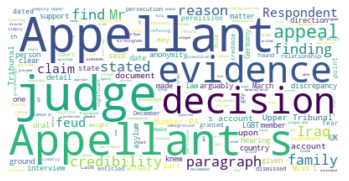

In [110]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud = WordCloud(background_color="white", repeat=True)
word_cloud.generate(text)

plt.axis("off")
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

## 5.5. What we have learned?

### 🤖📝 Now it's your turn:

🤖📝 Find the word 'EURODAC' using the function **<tt>search<tt>** from the **<tt>re<tt>** package.

🤖📝 Create a word cloud with different colour pattern using the text from the PDF.